In [2]:
#import lib and print for version control
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

import time

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

import pickle

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))


Python: 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy: 1.15.4
Pandas: 0.23.4


In [3]:
# import csv file through pandasLib
data = pd.read_csv('creditcard.csv')
print(data.isnull().any().any())
data.mean()
data.fillna(data.mean(),inplace=True)
print(data.isnull().any().any())


True
False


In [4]:
#data import verification and data metrics
print(data.shape)
print(data.columns)
print(data.describe())


(227844, 32)
Index(['Seconds since reference time', 'Amount',
       'Fraud? (1: Fraud, 0:  No Fraud)', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7',
       'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12',
       'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17',
       'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22',
       'Feature 23', 'Feature 24', 'Feature 25', 'Feature 26', 'Feature 27',
       'Feature 28', 'Feature 29'],
      dtype='object')
       Seconds since reference time         Amount  \
count                 227844.000000  227844.000000   
mean                   79042.504749      90.825317   
std                    39505.785991     250.504249   
min                        0.000000       0.000000   
25%                    47694.000000       6.000000   
50%                    73261.000000      23.400000   
75%                   120396.000000      79.990000   
ma

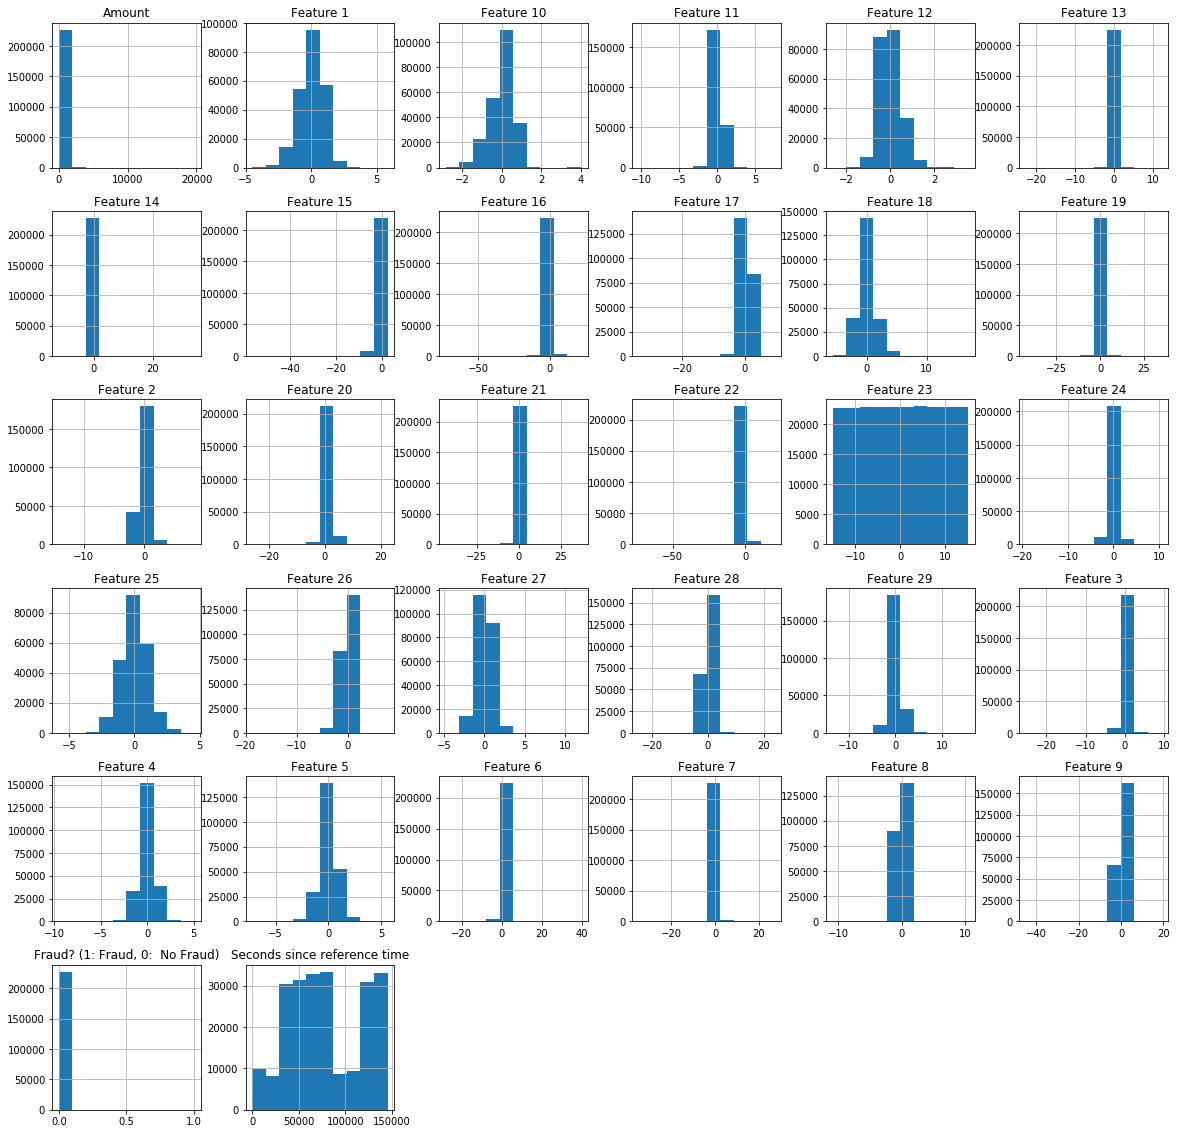

In [5]:
#visualization of datasets
data.hist(figsize = (20, 20))
plt.show()

In [6]:
# Calculate outlierFraction

Fraud = data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]
Valid = data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]

outlierFraction = len(Fraud)/float(len(Valid))
print(outlierFraction)

print('Fraud Cases: {}'.format(len(data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Fraud? (1: Fraud, 0:  No Fraud)'] == 0])))

0.0018335553826062869
Fraud Cases: 417
Valid Transactions: 227427


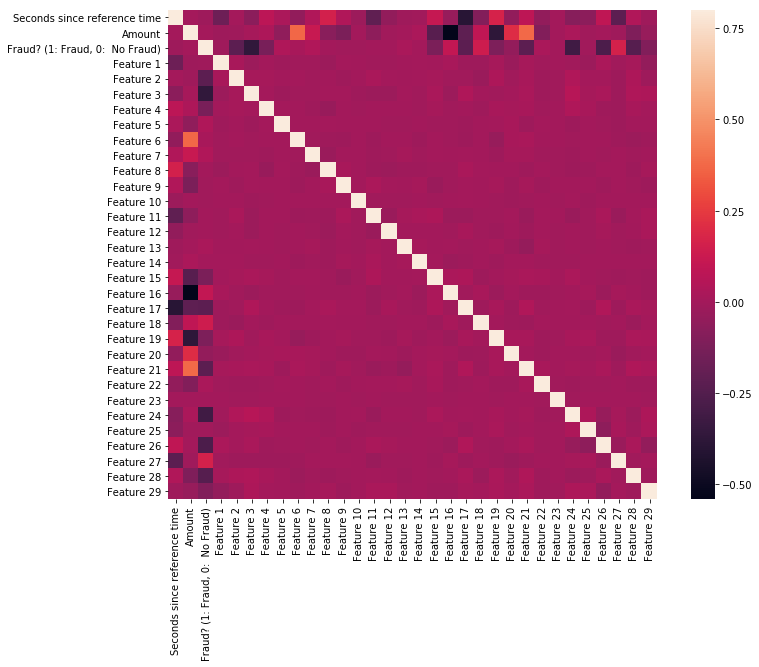

In [7]:
#plot correlation matrix to facilitate data cleaning

corrMat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrMat, vmax = .8, square = True)

In [8]:
# Filter the fraud? column
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Fraud? (1: Fraud, 0:  No Fraud)"]]

# targetPrediction
targetVariable = "Fraud? (1: Fraud, 0:  No Fraud)"

X = data[columns]
Y = data[targetVariable]

# verification of removal
print(X.shape)
print(Y.shape)

(227844, 31)
(227844,)


ML application

In [9]:
# define random states
randomState = 1

# define outlier detection tools to be compared
boostedTreeModel = AdaBoostClassifier(n_estimators=300,learning_rate=1)


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=101)
start = time.time()
boostedTreeModel.fit(X_train,y_train)
end = time.time()
print(end - start) 


filename = 'finalized_model.sav'
pickle.dump(boostedTreeModel, open(filename, 'wb'))        



142.4053099155426


In [44]:
loaded_model = pickle.load(open(filename, 'rb'))
start = time.time()
y_pred = loaded_model.predict(X)
end = time. time()
y_prob = loaded_model.predict_proba(X_test)
y_prob = y_prob[:, 1]
print(end - start)
        
    
    

5.095580101013184


AUC: 0.944


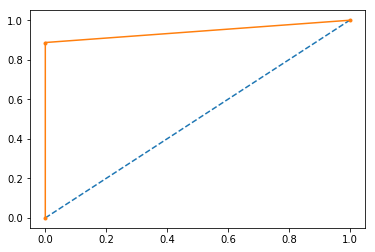

0.9997366619265814
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227427
           1       0.97      0.89      0.93       417

   micro avg       1.00      1.00      1.00    227844
   macro avg       0.98      0.94      0.96    227844
weighted avg       1.00      1.00      1.00    227844



In [51]:
auc = roc_auc_score(Y, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y, y_pred)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()
        
    
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

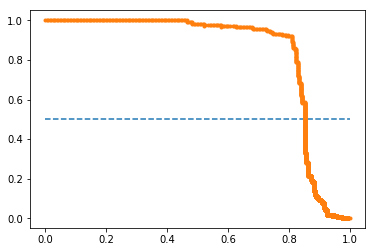

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1 = f1_score(Y, y_pred)
# calculate precision-recall AUC

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()